- 실제 image파일을 불러와서 convolution의 결과가 어떻게 나타나는 지를 확인해 봅니다.

In [3]:
import torch
from torch import nn
from skimage import io
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [5]:
img = 'https://upload.wikimedia.org/wikipedia/commons/e/e3/First_medical_X-ray_by_Wilhelm_R%C3%B6ntgen_of_his_wife_Anna_Bertha_Ludwig%27s_hand_-_18951222.gif'
#img = 'https://upload.wikimedia.org/wikipedia/commons/5/56/Golden_Doodle_dog_hip_xray_posterior_view.jpg'
I =io.imread(img)
print(I.dtype)
io.imshow(I)
I = torch.tensor(I)
I.shape

uint8


torch.Size([432, 295])

In [6]:
K = torch.tensor([[1,-1]])
Y = corr2d(I, K)
Y.shape
Y.dtype

torch.float32

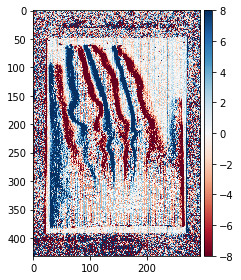

In [7]:
io.imshow(Y.numpy(),vmin=-8,vmax=8)